In [10]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords

In [11]:
# Open the NetCDF file
ncfile = Dataset('/home/cdonnely/WRF-model/WRF/run/wrfout_d01_2024-04-19_00:00:00')
ncfile2 = Dataset('/home/cdonnely/WRF-model/WRF/run/wrfout_d02_2024-04-19_00:00:00')

# Get the sea level pressure
slp = getvar(ncfile, "slp")
tc = getvar(ncfile, "T2")
tc2 = getvar(ncfile2, "T2")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(tc)
lats2,lons2 = latlon_coords(tc2)

# Get the basemap object
bm = get_basemap(tc)

In [21]:
bm.proj4string

'+proj=lcc +R=6370000.0 +units=m +lat_0=51.9647216796875 +lat_1=30.0 +lat_2=60.0 +lon_0=4.550000190734863 +x_0=663397.6324641275 +y_0=736984.8658155758 '

In [18]:
lats

<xarray.DataArray 'XLAT' (south_north: 119, west_east: 119)> Size: 57kB
array([[44.776154, 44.7887  , 44.800995, ..., 44.64001 , 44.624924,
        44.609604],
       [44.891888, 44.904446, 44.91678 , ..., 44.755455, 44.740337,
        44.72498 ],
       [45.007614, 45.020206, 45.032555, ..., 44.870903, 44.85576 ,
        44.84037 ],
       ...,
       [58.073494, 58.089485, 58.10517 , ..., 57.899918, 57.8807  ,
        57.861176],
       [58.18579 , 58.201813, 58.217545, ..., 58.01184 , 57.992577,
        57.973015],
       [58.29802 , 58.314087, 58.32984 , ..., 58.123695, 58.104393,
        58.084793]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 57kB -4.171 -4.008 ... 18.35 18.56
    XLAT     (south_north, west_east) float32 57kB 44.78 44.79 ... 58.1 58.08
    XTIME    float32 4B 0.0
    Time     datetime64[ns] 8B 2024-04-19
Dimensions without coordinates: south_north, west_east

/scratch-local/cdonnely/ipykernel_3580618/3926621478.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bm.pcolormesh(x, y, to_np(tc), cmap=get_cmap("GnBu"), vmin=276, vmax=282)
/scratch-local/cdonnely/ipykernel_3580618/3926621478.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  bm.pcolormesh(x, y, to_np(tc), cmap=get_cmap("GnBu"), vmin=276, vmax=282)
/scratch-local/cdonnely/ipykernel_3580618/3926621478.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(

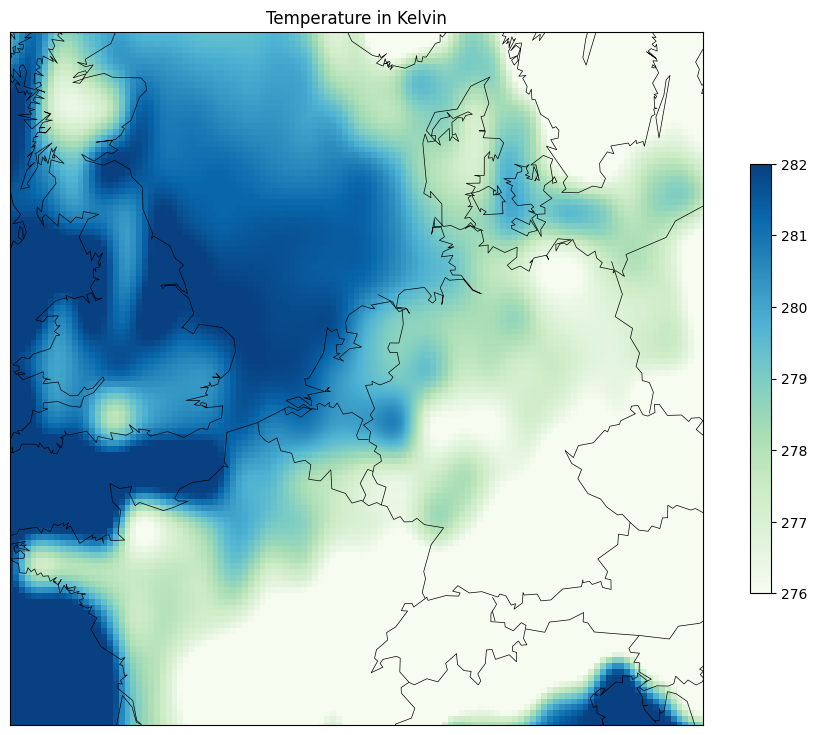

In [24]:
# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
bm.drawcoastlines(linewidth=0.5)
bm.drawcountries(linewidth=0.5)

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = bm(to_np(lons), to_np(lats))
x2, y2 = bm(to_np(lons2), to_np(lats2))

# Draw the contours and filled contours
#bm.contour(x, y, to_np(tc), 50, colors="black", linewidths=0.25, vmin=276, vmax=282)
bm.pcolormesh(x, y, to_np(tc), cmap=get_cmap("GnBu"), vmin=276, vmax=282)

#bm.contour(x2, y2, to_np(tc2), 15, colors="black", linewidths=0.25, vmin=276, vmax=282)
bm.pcolormesh(x2, y2, to_np(tc2), cmap=get_cmap("GnBu"), vmin=276, vmax=282)


# Add a color bar
plt.colorbar(shrink=.62)

plt.title("Temperature in Kelvin")

plt.show()
